In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("sample_submission.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [3]:
df.shape

(4277, 2)

In [4]:
df_test.shape

(4277, 13)

In [5]:
df_train.shape

(8693, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
df_train.Name.value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [13]:
df_train[df_train.Name == "Gollux Reedall"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
827,0881_01,Europa,False,D/32/S,TRAPPIST-1e,41.0,False,3103.0,3.0,0.0,31.0,26.0,Gollux Reedall,False
2852,3081_01,Europa,False,C/118/S,55 Cancri e,50.0,False,0.0,1547.0,0.0,1784.0,1.0,Gollux Reedall,True


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [15]:
df1= (df_train.isnull().sum()[df_train.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*df_train.isnull().sum()[df_train.isnull().sum()>0]/len(df_train)),3)
df1

,Number of Missing values,% of Missing Values
HomePlanet,201,2.312
CryoSleep,217,2.496
Cabin,199,2.289
Destination,182,2.094
Age,179,2.059
VIP,203,2.335
RoomService,181,2.082
FoodCourt,183,2.105
ShoppingMall,208,2.393
Spa,183,2.105


In [16]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

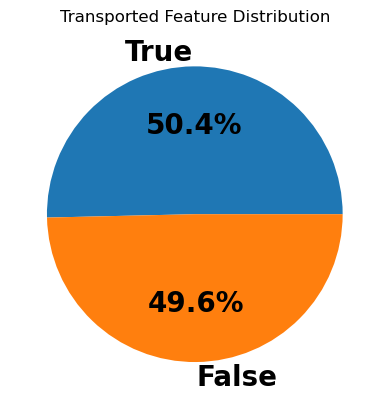

In [17]:
plt.pie(df_train["Transported"].value_counts(),labels=df_train["Transported"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"})
plt.title("Transported Feature Distribution");

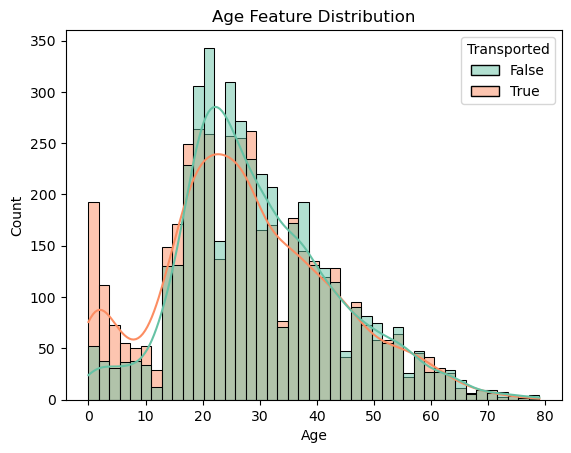

In [18]:
sns.histplot(x=df_train["Age"],hue="Transported",data=df_train,kde=True,palette="Set2")
plt.title("Age Feature Distribution");

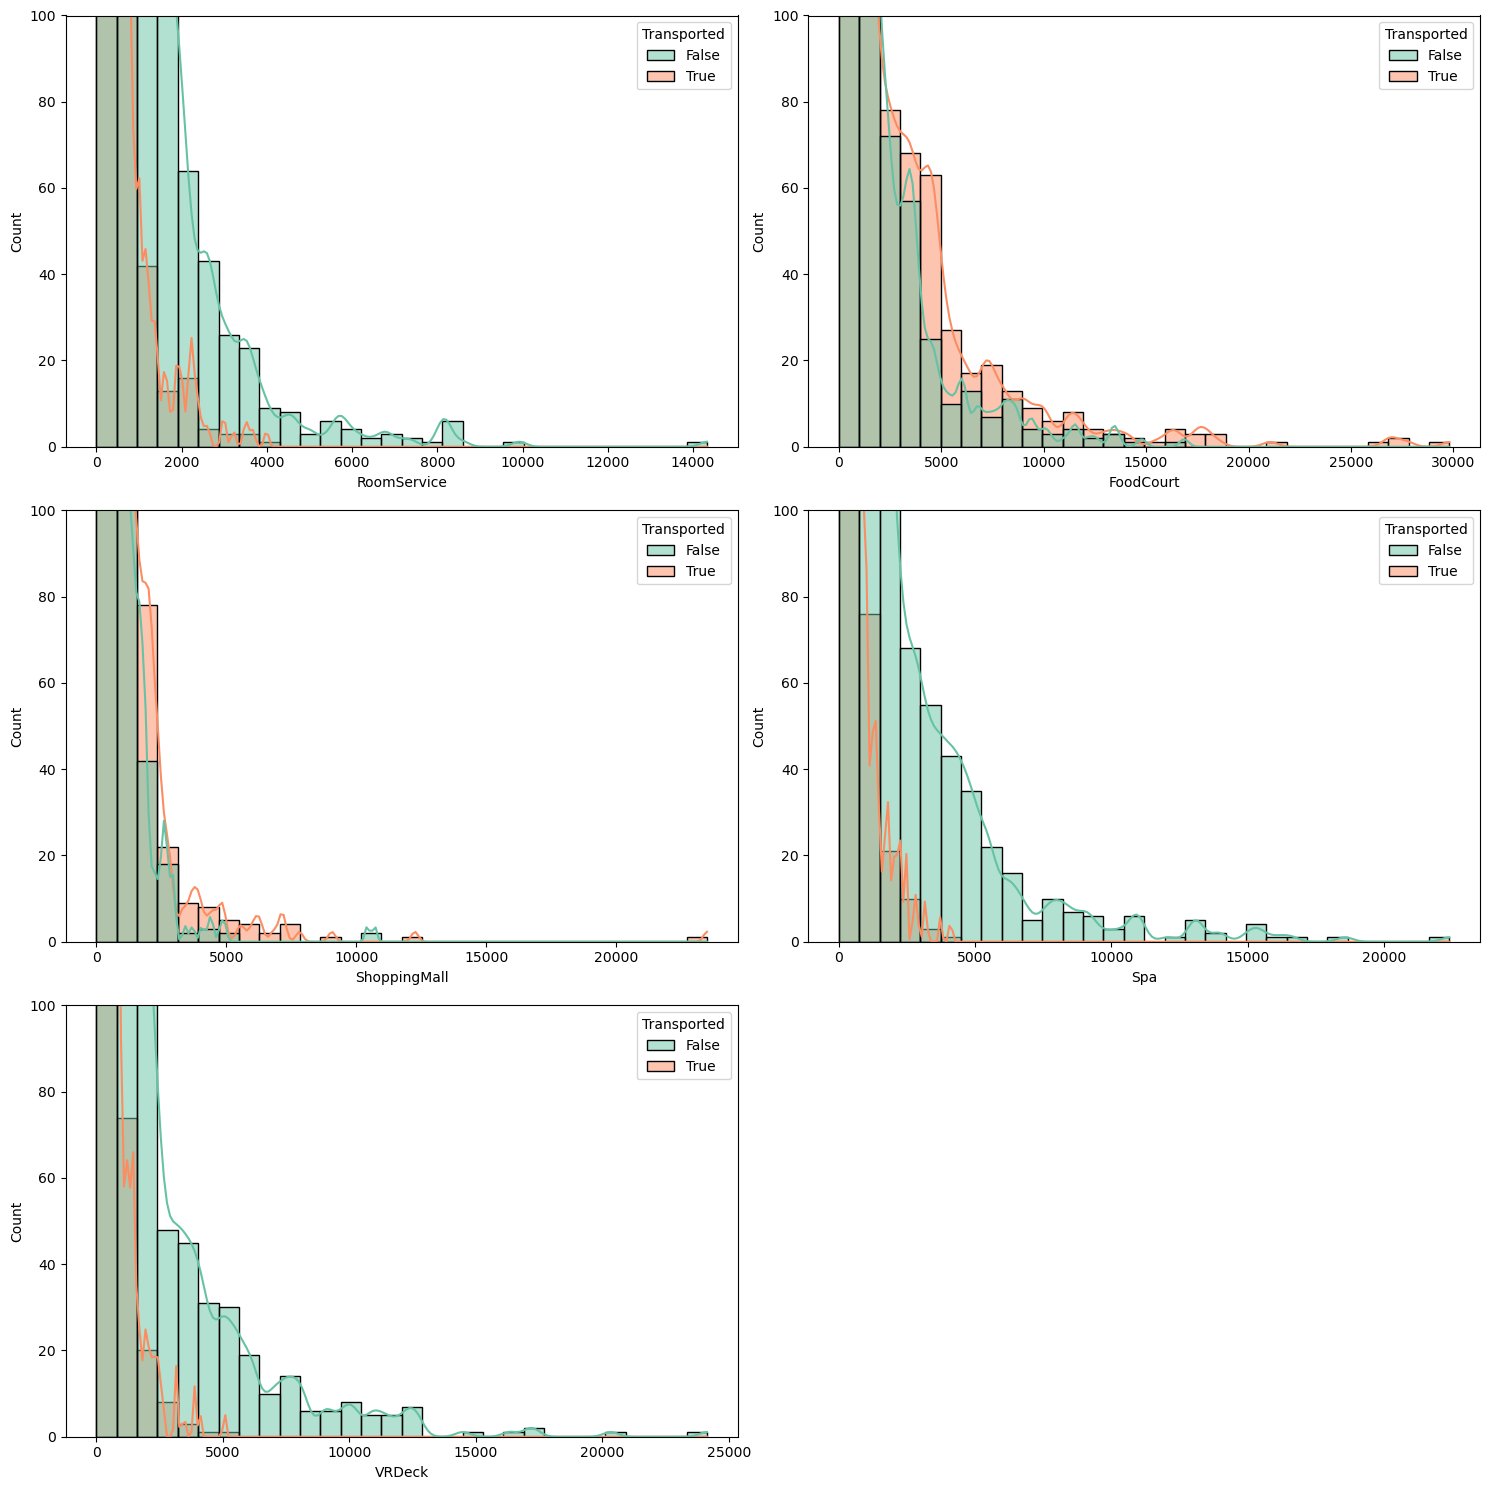

In [19]:
fasilitas1 = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
plt.figure(figsize=(15,15))
for idx,column in enumerate(fasilitas1):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=df_train,bins=30,kde=True,palette="Set2")
    plt.ylim(0,100)
    plt.tight_layout()

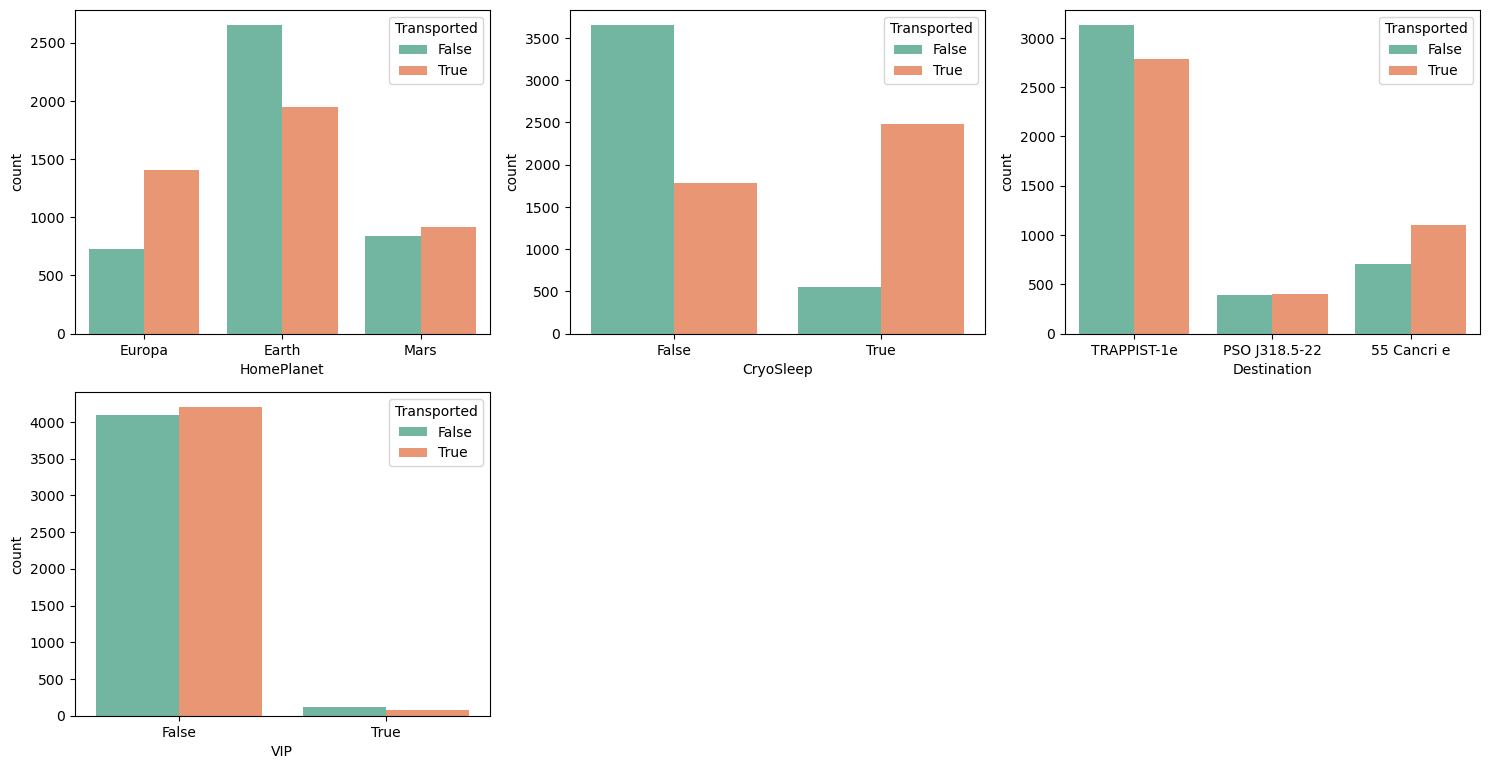

In [20]:
fasilitas2= ["HomePlanet","CryoSleep","Destination","VIP"]
plt.figure(figsize=(15,15))
for idx,column in enumerate(fasilitas2):
    plt.subplot(4,3,idx+1)
    sns.countplot(x=column, hue="Transported", data=df_train,palette="Set2")
    plt.tight_layout()


In [21]:
df_train.shape

(8693, 14)

In [22]:
def pembagianpassenger(df):
    df["group"]=df["PassengerId"].apply(lambda x:x.split("_")[0])
    df["member"]=df["PassengerId"].apply(lambda x:x.split("_")[1])
    x=df.groupby("group")["member"].count().sort_values()
    y=set(x[x>1].index)
    df["solotrav"]=df["group"].apply(lambda x:x not in y )
    df["jumlahgroup"]=0
    for i in x.items():
        df.loc[df["group"]==i[0],"jumlahgroup"]=i[1]

In [23]:
pembagianpassenger(df_train)
pembagianpassenger(df_test)

In [24]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,member,solotrav,jumlahgroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1


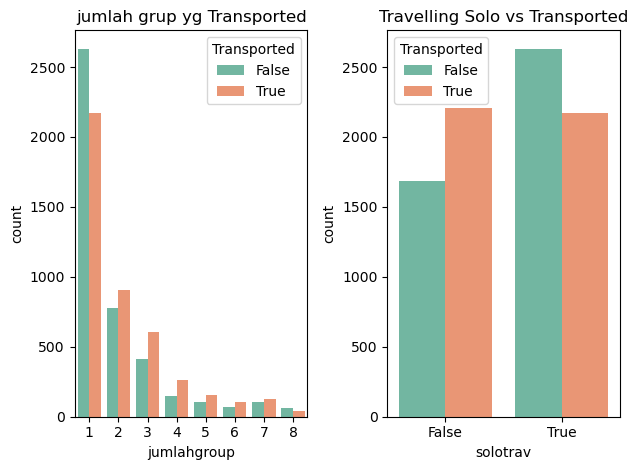

In [25]:
plt.subplot(1,2,1)
sns.countplot(x="jumlahgroup", hue="Transported", data=df_train,palette="Set2")
plt.title("jumlah grup yg Transported")

plt.subplot(1,2,2)
sns.countplot(x="solotrav", hue="Transported", data=df_train,palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

In [26]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
     #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

In [27]:
cabin_new_feature(df_train)
cabin_new_feature(df_test)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  group         8693 non-null   object 
 15  member        8693 non-null   object 
 16  solotrav      8693 non-null   bool   
 17  jumlahgroup   8693 non-null   int64  
 18  Cabin_Deck    8693 non-null 

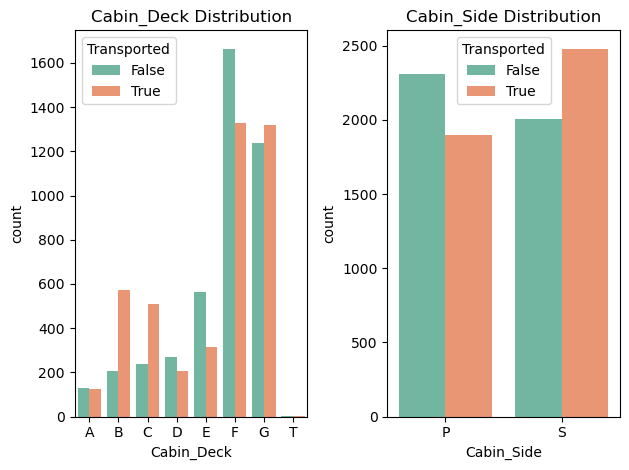

In [29]:
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=df_train, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=df_train, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()

In [30]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
group            object
member           object
solotrav           bool
jumlahgroup       int64
Cabin_Deck       object
Cabin_Number     object
Cabin_Side       object
dtype: object

In [31]:
df_train["Cabin_Number"]=df_train["Cabin_Number"].astype(int)
df_test["Cabin_Number"]=df_test["Cabin_Number"].astype(int)

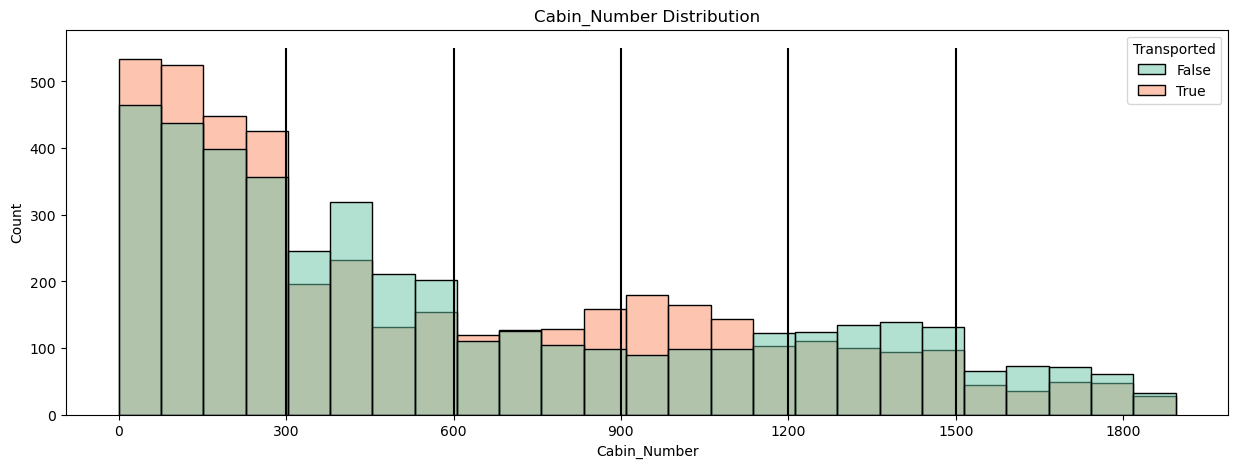

In [32]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=df_train,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

In [33]:
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_0-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33_50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)
        
    df["Age Group"] = age_group

In [34]:
age_group(df_train)
age_group(df_test)

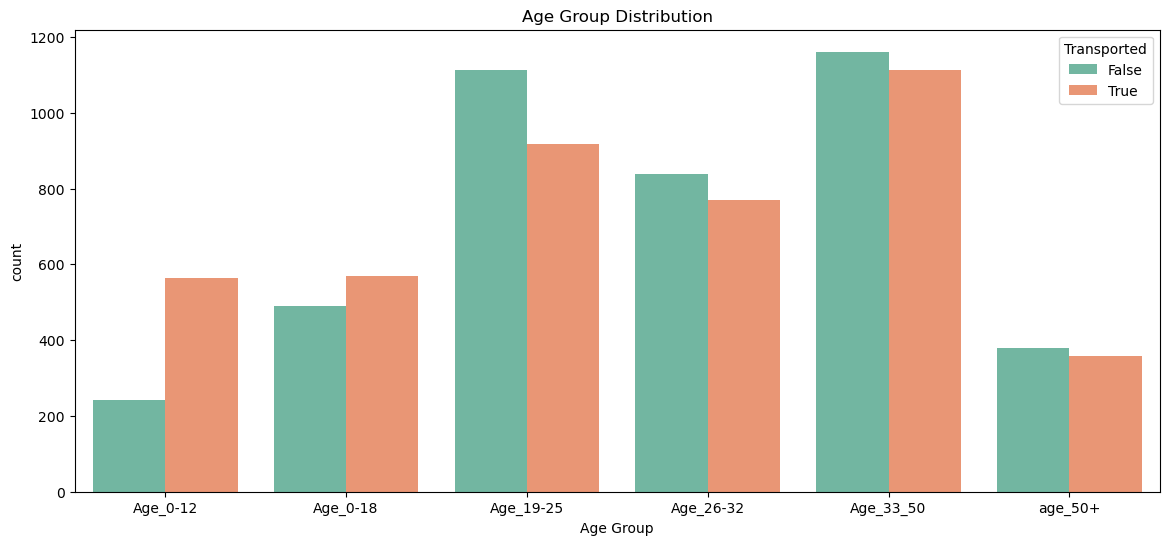

In [35]:
order = sorted(df_train["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported", data=df_train, palette="Set2",order=order)
plt.title("Age Group Distribution");